In [1]:
import pandas as pd
import numpy as np

In [2]:
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

In [3]:
# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings

In [4]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#split data
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Airline-Sentiment.csv', header= 0,
                        encoding= 'unicode_escape')

In [7]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/2015 5:24,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,5.700000e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/2015 1:53,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,5.700000e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/2015 10:01,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,5.700000e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/2015 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,5.700000e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/2015 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,5.700000e+17,NaN,Pacific Time (US & Canada)


In [8]:
df.shape

(14640, 18)

Data Visualization


_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64


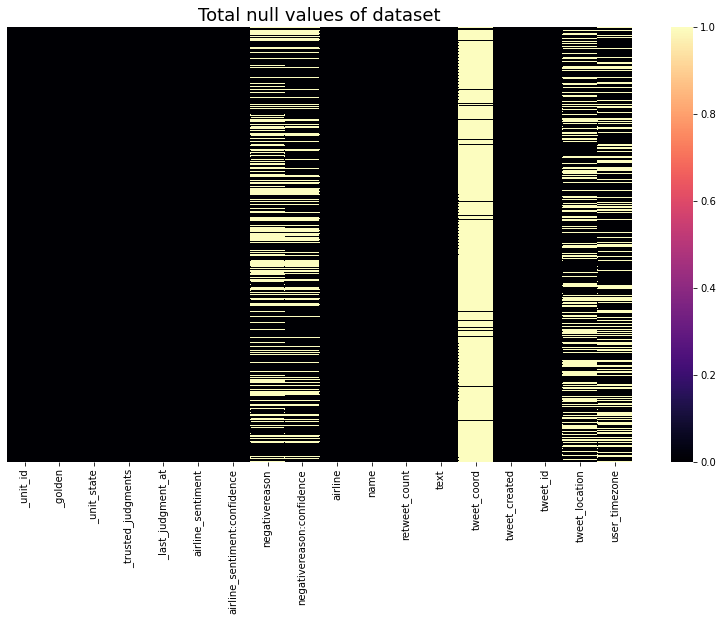

In [9]:
# showing null values of train data
print(df.isnull().sum()) 
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), yticklabels = False, cmap='magma')
plt.title('Total null values of dataset',size=18);

Total number of sentiments of tweets

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


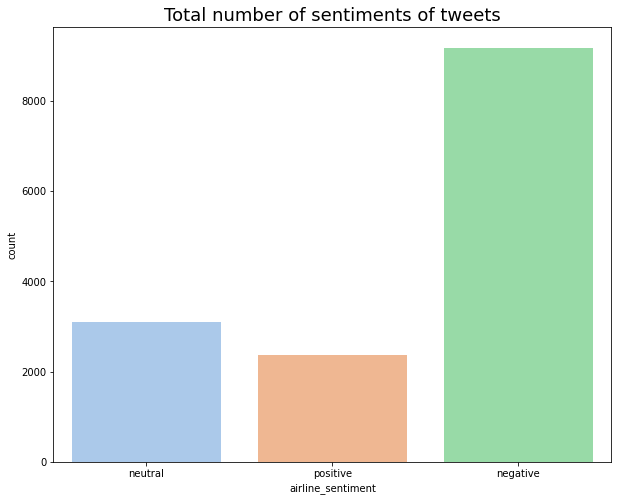

In [10]:
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 18)
plt.show()

Total number of tweets for each airline

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


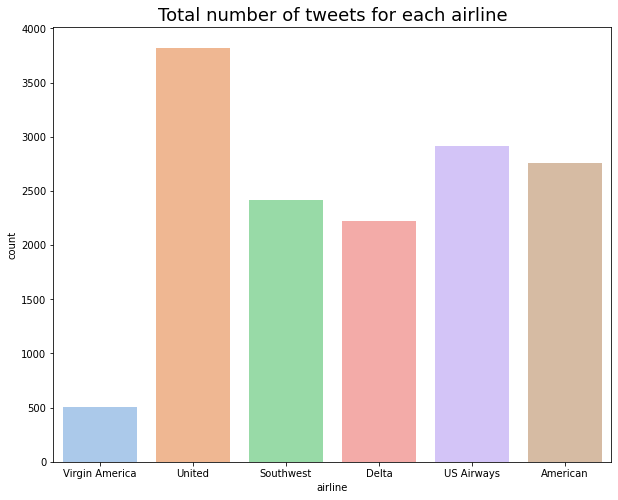

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [11]:
print(df.groupby('airline')['airline_sentiment'].count())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 18)
plt.show()
cprint("Total number of sentiment tweets for each airline :",'red')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

In [12]:
# Split text of Sentiments    
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

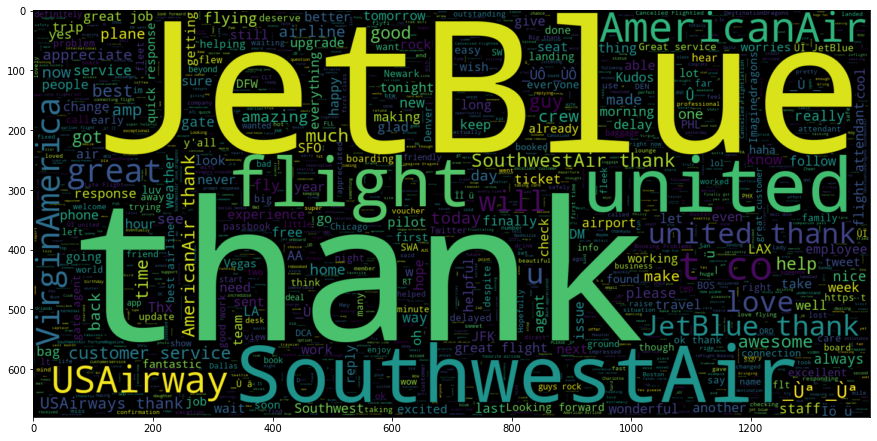

In [13]:
# world could of positive sentiments
plt.figure(figsize = (15,15)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 5000 , width = 1400 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)

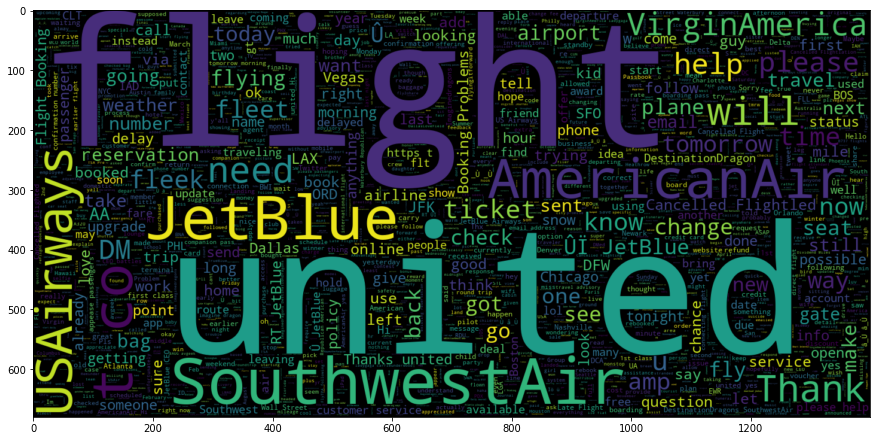

In [14]:
# world could of neutral sentiments
plt.figure(figsize = (15,15)) 
worldcould_neutral = WordCloud(min_font_size = 3,  max_words = 5000 , width = 1400 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcould_neutral,interpolation = 'bilinear')
ax.grid(False)

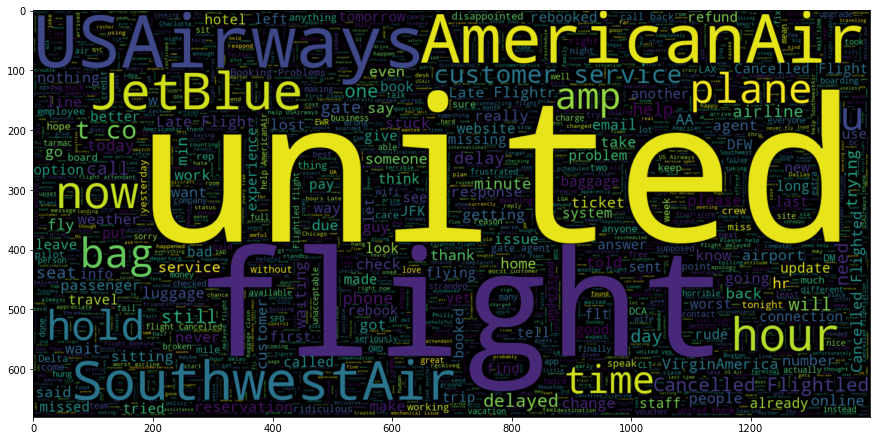

In [15]:
# world could of negative sentiments
plt.figure(figsize = (15,15)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 5000 , width = 1400 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)

Text Preprocessing And Cleaning

In [16]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [17]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [18]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [19]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

In [20]:
# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [21]:
# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [22]:
# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [23]:
# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

In [24]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [25]:
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

In [26]:
# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)
def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute
def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [27]:
# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 

In [28]:
from nltk.corpus import stopwords

In [29]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import nltk

In [31]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [32]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [35]:
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [36]:
review_df = df[['text','final_text','airline_sentiment']]

print(review_df.shape)
review_df.head(10)

(14640, 3)


,text,final_text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,said,1
1,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky,2
2,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip,1
3,@VirginAmerica it's really aggressive to blast...,bad flight really aggressive blast obnoxious e...,0
4,@VirginAmerica and it's a really big bad thing...,ca tell really big bad thing,0
5,@VirginAmerica seriously would pay $30 a fligh...,ca tell seriously would pay flight seats playi...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",yes nearly every time fly vx ear worm go away,2
7,@VirginAmerica Really missed a prime opportuni...,really missed prime opportunity men without ha...,1
8,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D",well,2
9,"@VirginAmerica it was amazing, and arrived an ...",amazing arrived hour early good,2


In [37]:
X = df['final_text']
y = df['airline_sentiment']

In [38]:
# Apply TFIDF on cleaned tweets
tfidf = TfidfVectorizer()
X_final =  tfidf.fit_transform(X)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
print(len(tfidf.vocabulary_))

10986


In [41]:
tfidf.vocabulary_

{'said': 8282,
 'plus': 7211,
 'added': 123,
 'commercials': 1864,
 'experience': 3310,
 'tacky': 9438,
 'today': 9777,
 'must': 6238,
 'mean': 5874,
 'need': 6314,
 'take': 9454,
 'another': 435,
 'trip': 9942,
 'bad': 768,
 'flight': 3605,
 'really': 7712,
 'aggressive': 204,
 'blast': 1048,
 'obnoxious': 6602,
 'entertainment': 3116,
 'guests': 4193,
 'faces': 3370,
 'amp': 381,
 'little': 5527,
 'recourse': 7768,
 'ca': 1354,
 'tell': 9540,
 'big': 986,
 'thing': 9649,
 'seriously': 8523,
 'would': 10833,
 'pay': 6982,
 'seats': 8444,
 'playing': 7179,
 'flying': 3665,
 'va': 10318,
 'yes': 10913,
 'nearly': 6310,
 'every': 3219,
 'time': 9736,
 'fly': 3656,
 'vx': 10464,
 'ear': 2931,
 'worm': 10807,
 'go': 4038,
 'away': 728,
 'missed': 6066,
 'prime': 7405,
 'opportunity': 6724,
 'men': 5930,
 'without': 10750,
 'hats': 4300,
 'parody': 6916,
 'well': 10601,
 'amazing': 343,
 'arrived': 572,
 'hour': 4538,
 'early': 2934,
 'good': 4064,
 'know': 5257,
 'suicide': 9290,
 'second'

In [42]:
from flask import Flask, render_template, Response

In [43]:
response = tfidf.fit_transform(X)

In [44]:
print(X)

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object


In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [47]:
from scipy.sparse import csr_matrix
sparsematrix = csr_matrix(X_final)
print(sparsematrix)

  (0, 8282)	1.0
  (1, 9438)	0.5715144216199972
  (1, 3310)	0.3059111495163962
  (1, 1864)	0.4991825649009825
  (1, 123)	0.4357510390241188
  (1, 7211)	0.3751365529646431
  (2, 9942)	0.36395420765197306
  (2, 435)	0.34633875964424976
  (2, 9454)	0.34712077682710796
  (2, 6314)	0.29810885808388093
  (2, 5874)	0.45320923958874404
  (2, 6238)	0.48311623162963613
  (2, 9777)	0.31531756249018034
  (3, 7768)	0.34172941680948205
  (3, 5527)	0.24745102976128194
  (3, 381)	0.16193482755134644
  (3, 3370)	0.35747511722056036
  (3, 4193)	0.3488096329719864
  (3, 3116)	0.28478615899228715
  (3, 6602)	0.36864686945245756
  (3, 1048)	0.36864686945245756
  (3, 204)	0.35747511722056036
  (3, 7712)	0.19007094309233563
  (3, 3605)	0.07520299819101564
  (3, 768)	0.154383894408021
  :	:
  (14637, 241)	0.3646003960065555
  (14637, 7186)	0.28125266422116013
  (14638, 9288)	0.4309101166888255
  (14638, 1867)	0.4764689487768966
  (14638, 7088)	0.3944599855576322
  (14638, 5747)	0.2679196217307357
  (14638, 612

In [48]:
print(sparsematrix.shape)

(14640, 10986)


In [49]:
print(sparsematrix.dtype)

float64


In [50]:
import scipy 

In [51]:
import scipy.io as sio

In [52]:
adict = {}
adict['x_sm'] = x_sm
adict['y_sm'] = y_sm
sio.savemat('tfidffeature.mat', adict)

In [53]:
# Split Data into train & test 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)

In [54]:
print("n_samples: %d, n_features: %d" % X_train.shape)


n_samples: 22027, n_features: 10986


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score 

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction =  rf.predict(X_test)
accuracy_score(rf_prediction,y_test)

0.9575086253858726

In [58]:
cr = classification_report(y_test, rf_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1822
           1       0.95      0.93      0.94      1840
           2       0.95      0.94      0.94      1845

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507



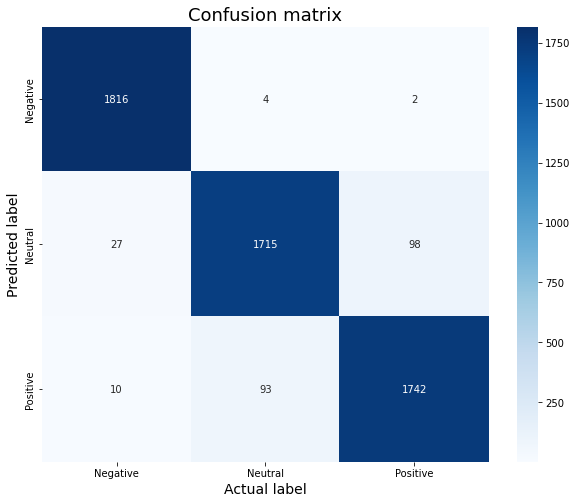

In [59]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,rf_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()

In [60]:
svm = SVC()
svm.fit(X_train,y_train)
svm_prediction =  svm.predict(X_test)
accuracy_score(svm_prediction,y_test)

0.9404394407118213

In [61]:
cr = classification_report(y_test, svm_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1822
           1       0.89      0.95      0.92      1840
           2       0.96      0.87      0.92      1845

    accuracy                           0.94      5507
   macro avg       0.94      0.94      0.94      5507
weighted avg       0.94      0.94      0.94      5507



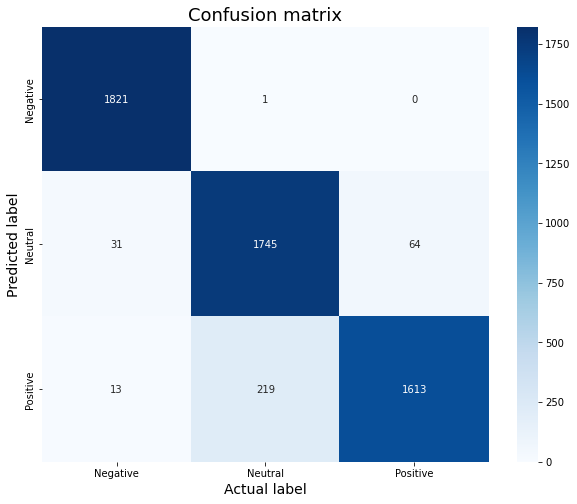

In [62]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,svm_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()

In [63]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
accuracy_score(nb_prediction,y_test)

0.853640820773561

In [64]:
cr = classification_report(y_test, nb_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1822
           1       0.89      0.71      0.79      1840
           2       0.89      0.89      0.89      1845

    accuracy                           0.85      5507
   macro avg       0.86      0.85      0.85      5507
weighted avg       0.86      0.85      0.85      5507



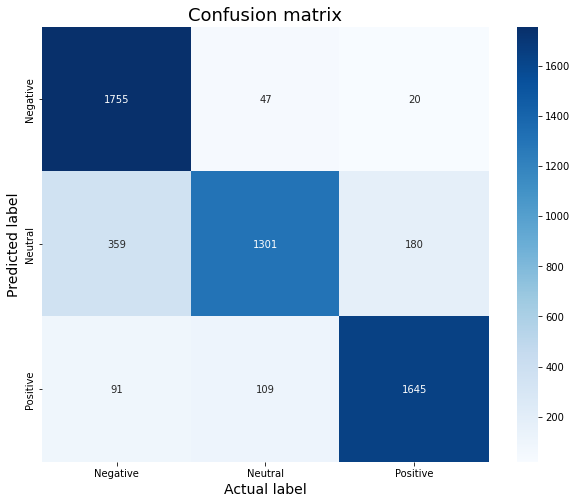

In [65]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,nb_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()

In [66]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)
ds_prediction =  ds.predict(X_test)
accuracy_score(ds_prediction,y_test)

0.9480660976938442

In [67]:
cr = classification_report(y_test, ds_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1822
           1       0.93      0.92      0.93      1840
           2       0.92      0.94      0.93      1845

    accuracy                           0.95      5507
   macro avg       0.95      0.95      0.95      5507
weighted avg       0.95      0.95      0.95      5507



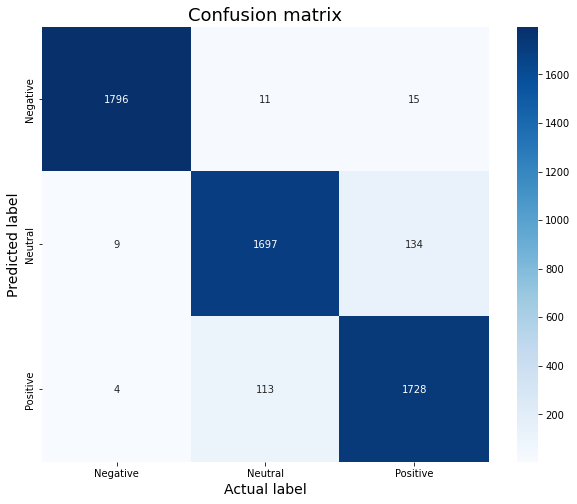

In [68]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,ds_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
accuracy_score(knn_prediction,y_test)

0.6041401852188124

In [70]:
cr = classification_report(y_test, knn_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      0.05      0.10      1822
           1       0.51      0.89      0.65      1840
           2       0.72      0.86      0.78      1845

    accuracy                           0.60      5507
   macro avg       0.74      0.60      0.51      5507
weighted avg       0.74      0.60      0.51      5507



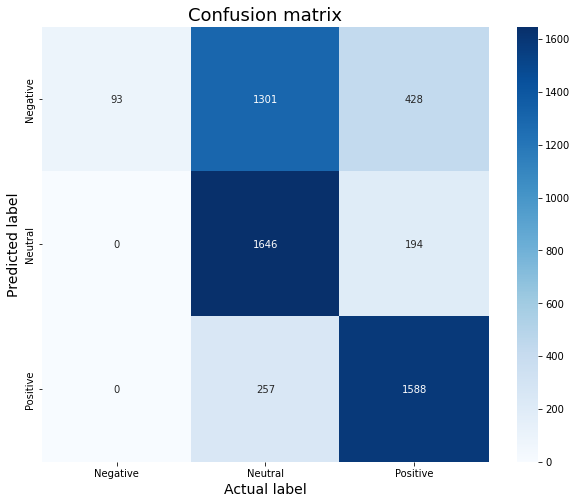

In [71]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,knn_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()

In [72]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
accuracy_score(lr_prediction,y_test)

0.8997639368076993

In [73]:
cr = classification_report(y_test, lr_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1822
           1       0.82      0.91      0.86      1840
           2       0.93      0.80      0.86      1845

    accuracy                           0.90      5507
   macro avg       0.90      0.90      0.90      5507
weighted avg       0.90      0.90      0.90      5507



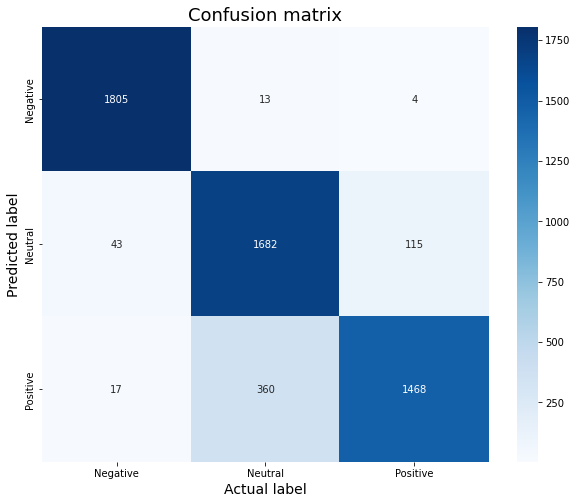

In [74]:
print("Classification Report:\n----------------------\n", cr)
cm = confusion_matrix(y_test,lr_prediction)
# plot confusion matrix 
plt.figure(figsize=(10,8))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=18)
plt.xlabel('Actual label', fontsize=14)
plt.ylabel('Predicted label', fontsize=14)
plt.show()